# 7 Python推导式

推导式comprehensions（又称解析式），是Python的一种独有特性。推导式是可以从一个数据序列构建另一个新的数据序列的结构体。 共有三种推导，在Python2和3中都有支持：

- 列表(list)推导式
- 字典(dict)推导式
- 集合(set)推导式

## 7.1 列表推导式

使用[]和循环可以用来生成列表：

基本格式

    variable = [out_exp_res for out_exp in input_list if out_exp == 2]
      out_exp_res:　　列表生成元素表达式，可以是有返回值的函数。
      for out_exp in input_list：　　迭代input_list将out_exp传入out_exp_res表达式中。
      if out_exp == 2：　　根据条件过滤哪些值可以。

In [7]:
#help(range)
#range?
#range??

In [ ]:
[x * x for x in range(1, 100)]

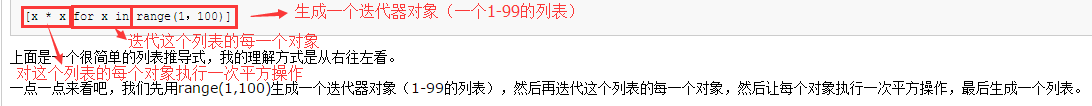

In [16]:
[(x,y) for x in range(1, 4) for y in range(1, 4)]

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

用推导列表式生成元组，

理解一下：先用range（）生成一个列表，然后迭代，这个操作执行了两次，一次是x，一次是y，然后再用元组的定义生成一个列表。

再来看一个对比的例子

In [19]:
values = [10, 21, 4, 7, 12]
squares = []
for x in values:
    squares.append(x**2)
print(squares)

[100, 441, 16, 49, 144]


列表推导式可以使用更简单的方法来创建这个列表：

In [18]:
values = [10, 21, 4, 7, 12]
squares = [x**2 for x in values]
print(squares)

[100, 441, 16, 49, 144]


还可以在列表推导式中加入条件进行筛选。

例如在上面的例子中，假如只想保留列表中不大于`10`的数的平方：

In [1]:
values = [10, 21, 4, 7, 12]
squares = [x**2 for x in values if x <= 10]
print(squares)

[100, 16, 49]


使用()生成generator

将俩表推导式的[]改成()即可得到生成器。 生成器的概念，后面深入讲解。

In [5]:
multiples = (i for i in range(30) if i % 3 is 0)
print(type(multiples))
print(multiples)

<class 'generator'>
<generator object <genexpr> at 0x00000214413CC570>


In [4]:
for i in multiples:
    print(i)

0
3
6
9
12
15
18
21
24
27


## 7.2 集合推导式&字典推导式

它们跟列表推导式也是类似的。 唯一的区别在于它使用大括号{}。

In [23]:
square_set = {x**2 for x in values if x <= 10}
print(square_set)

square_dict = {x: x**2 for x in values if x <= 10}
print(square_dict)

{16, 49, 100}
{10: 100, 4: 16, 7: 49}


大小写key合并

In [24]:
mcase = {'a': 10, 'b': 34, 'A': 7, 'Z': 3}
mcase_frequency = {
    k.lower(): mcase.get(k.lower(), 0) + mcase.get(k.upper(), 0)
    for k in mcase.keys()
    if k.lower() in ['a','b']
}
print(mcase_frequency)

{'a': 17, 'b': 34}


快速更换key和value

In [25]:
mcase = {'a': 10, 'b': 34}
mcase_frequency = {v: k for k, v in mcase.items()}
print(mcase_frequency)

{10: 'a', 34: 'b'}


再如，计算上面例子中生成的列表中所有元素的和：

In [26]:
total = sum([x**2 for x in values if x <= 10])
print(total)

165


但是，**Python**会生成这个列表，然后在将它放到垃圾回收机制中（因为没有变量指向它），这毫无疑问是种浪费。

为了解决这种问题，**Python**使用产生式表达式来解决这个问题：

In [27]:
total = sum(x**2 for x in values if x <= 10)
print(total)

165


与上面相比，只是去掉了括号，但这里并不会一次性的生成这个列表。

比较一下两者的用时：

In [28]:
x = range(1000000)

In [29]:
%timeit total = sum([i**2 for i in x])

514 ms ± 58.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%timeit total = sum(i**2 for i in x)

487 ms ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 7.3 enumerate

这是一个有意思的内置函数，本来我们可以通过for i in range(len(list))的方式得到一个list的每个元素编号，然后在用list[i]的方式得到该元素。如果要同时得到元素编号和元素怎么办？就是这样了:

In [32]:
week = ["monday", "sunday", "friday"]
for i in range(len(week)):
    print(week[i]+' is '+str(i))   #注意，i是int类型，如果和前面的用+连接，必须是str类型

monday is 0
sunday is 1
friday is 2


python中提供了一个内置函数enumerate，能够实现类似的功能,算是一个有意思的内置函数了，主要是提供一个简单快捷的方法

In [34]:
for (i,day) in enumerate(week):
    print(day +' is '+ str(i))

monday is 0
sunday is 1
friday is 2


顺便抄录几个例子，供看官欣赏，最好实验一下

In [35]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

In [36]:
list(enumerate(seasons, start=1))

[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]

In [ ]:
用列表生成器打印九九乘法表

In [37]:
print('\n'.join(['\t'.join(['%d * %d = %d'%(y,x,x*y) for y in range(1,x+1)])for x in range(1,10)]))

1 * 1 = 1
1 * 2 = 2	2 * 2 = 4
1 * 3 = 3	2 * 3 = 6	3 * 3 = 9
1 * 4 = 4	2 * 4 = 8	3 * 4 = 12	4 * 4 = 16
1 * 5 = 5	2 * 5 = 10	3 * 5 = 15	4 * 5 = 20	5 * 5 = 25
1 * 6 = 6	2 * 6 = 12	3 * 6 = 18	4 * 6 = 24	5 * 6 = 30	6 * 6 = 36
1 * 7 = 7	2 * 7 = 14	3 * 7 = 21	4 * 7 = 28	5 * 7 = 35	6 * 7 = 42	7 * 7 = 49
1 * 8 = 8	2 * 8 = 16	3 * 8 = 24	4 * 8 = 32	5 * 8 = 40	6 * 8 = 48	7 * 8 = 56	8 * 8 = 64
1 * 9 = 9	2 * 9 = 18	3 * 9 = 27	4 * 9 = 36	5 * 9 = 45	6 * 9 = 54	7 * 9 = 63	8 * 9 = 72	9 * 9 = 81


## 7.4 推导式实例

### 例1: 

过滤掉长度小于3的字符串列表，并将剩下的转换成大写字母


In [2]:
names = ['bob','tom','alice','jerry','wendy','smith'] 
[name.upper() for name in names if len(name)>3]

['ALICE', 'JERRY', 'WENDY', 'SMITH']

### 例2

求(x,y)其中x是0-5之间的偶数，y是0-5之间的奇数组成的元祖列表

In [3]:
[(x,y) for x in range(5) if x%2==0 for y in range(5) if y %2==1]  

[(0, 1), (0, 3), (2, 1), (2, 3), (4, 1), (4, 3)]

### 例3

    字符串A: "ABCD"
    字符串B: "XYZ"
    从A/B中各取一个字符，有多少种组合

In [6]:
print([m + n for m in 'ABCD' for n in 'XYZ']  )

['AX', 'AY', 'AZ', 'BX', 'BY', 'BZ', 'CX', 'CY', 'CZ', 'DX', 'DY', 'DZ']


### 例4

    m = [[1,2,3],  
         [4,5,6],  
         [7,8,9]]  
         
    求m中3,6,9组成的列表

In [8]:
 m = [[1,2,3],  
         [4,5,6],  
         [7,8,9]] 

print(m)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [9]:
[row[2] for row in m] 

[3, 6, 9]

In [10]:
[m[row][2] for row in (0,1,2)] 

[3, 6, 9]

### 例5 

求m中斜线1,5,9组成的列表

In [12]:
[m[i][i] for i in range(len(m))]

[1, 5, 9]

### 例6

求m,n中矩阵和元素的乘积

In [13]:
m = [[1,2,3],  
     [4,5,6],  
     [7,8,9]]  

n = [[2,2,2],  
     [3,3,3],  
     [4,4,4]]  

In [14]:
[m[row][col] * n[row][col] for row in range(3) for col in range(3)]  

[2, 4, 6, 12, 15, 18, 28, 32, 36]

In [15]:
[[m[row][col] * n[row][col] for col in range(3)] for row in range(3)]  

[[2, 4, 6], [12, 15, 18], [28, 32, 36]]

In [16]:
[[m[row][col]*n[row][col] for row in range(3)] for col in range(3)]

[[2, 12, 28], [4, 15, 32], [6, 18, 36]]

### 例7

列表推导式可以嵌套。
考虑以下的 3x4 矩阵，一个列表中包含三个长度为4的列表:

    matrix = [
         [1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]]
现在，如果你想交换行和列

In [22]:
matrix = [
         [1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]]

[[row[i] for row in matrix] for i in range(4)] 

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]

嵌套的列表推导式是对 for 后面的内容进行求值，所以上例就等价于

In [23]:
transposed = []

for i in range(4):  
    transposed.append([row[i] for row in matrix])

print(transposed)

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]


反过来说，如下也是一样的

In [25]:
transposed = []  
for i in range(4):  
    # the following 3 lines implement the nested listcomp  
    transposed_row = []  
    for row in matrix:  
        transposed_row.append(row[i])  
    transposed.append(transposed_row)
    
print(transposed)

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]


### 例8

字典中age键，按照条件赋新值

In [18]:
bob = {'pay': 3000, 'job': 'dev', 'age': 42, 'name': 'bob smith'}
sue = {'pay': 4000, 'job': 'hdw', 'age': 45, 'name': 'sue jones'}
people = [bob, sue]

In [19]:
[rec['age']+100 if rec['age'] >= 45 else rec['age'] for rec in people] # 注意for位置 

[42, 145]

### 例9

用字典推导式以字符串以及其长度建字典

In [26]:
strings = ['import','is','with','if','file','exception']

d = {key: val for key in enumerate(strings)}   #感觉有bug

print(d)

{'import': 0, 'is': 1, 'with': 2, 'if': 3, 'file': 4, 'exception': 5}


### 例10

用集合推导建字符串长度的集合

In [27]:
strings = ['a','is','with','if','file','exception']  

{len(s) for s in strings} #有长度相同的会只留一个，这在实际上也非常有用  

{1, 2, 4, 9}